In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/zomato_cleaned.csv')
df

,url,online_order,book_table,rate,votes,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),Afghan,...,Spanish,Steak,Street Food,Sushi,Tamil,Tea,Thai,Tibetan,Turkish,Vietnamese
0,https://www.zomato.com/bangalore/jalsa-banasha...,1,1,4.1,775,Casual Dining,800,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
1,https://www.zomato.com/bangalore/spice-elephan...,1,0,4.1,787,Casual Dining,800,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
2,https://www.zomato.com/SanchurroBangalore?cont...,1,0,3.8,918,"Cafe, Casual Dining",800,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
3,https://www.zomato.com/bangalore/addhuri-udupi...,0,0,3.7,88,Quick Bites,300,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
4,https://www.zomato.com/bangalore/grand-village...,0,0,3.8,166,Casual Dining,600,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13222,https://www.zomato.com/bangalore/fujian-expres...,1,0,3.8,182,Food Court,600,Dine-out,Whitefield,0,...,0,0,0,0,0,0,1,0,0,0
13223,https://www.zomato.com/bangalore/nook-aloft-be...,0,1,4.2,411,Casual Dining,1800,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0
13224,https://www.zomato.com/bangalore/seeya-restaur...,0,0,3.3,4,Quick Bites,350,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0
13225,https://www.zomato.com/bangalore/andhra-spices...,0,0,3.2,4,Quick Bites,300,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x = df.drop(['rate', 'url'], axis=1)
y = df['rate']

In [4]:
y = y.apply(lambda x: 1 if x >= 3.75 else 0)

In [5]:
cat = x.select_dtypes(include='object').columns
numeric = x.select_dtypes(exclude='object').columns

In [6]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')
cat_data = ohe.fit_transform(x[cat]).toarray() 

In [7]:
x = pd.concat([x[numeric], pd.DataFrame(cat_data, columns=ohe.get_feature_names(cat))], axis=1)

c:\Users\Yousef\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.2, random_state= 42, stratify=y)

In [10]:
y_train.value_counts()

0    5881
1    4700
Name: rate, dtype: int64

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_train , y_train = smote.fit_resample(x_train,y_train)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, classification_report, plot_confusion_matrix

### DecisionTree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5881
           1       1.00      1.00      1.00      5881

    accuracy                           1.00     11762
   macro avg       1.00      1.00      1.00     11762
weighted avg       1.00      1.00      1.00     11762

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1471
           1       0.80      0.82      0.81      1175

    accuracy                           0.83      2646
   macro avg       0.83      0.83      0.83      2646
weighted avg       0.83      0.83      0.83      2646



c:\Users\Yousef\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,Actual,Predicted
13061,0,0
9100,0,0
272,0,0
4194,1,1
7149,1,1
...,...,...
11914,0,1
5519,1,1
1558,1,1
11659,0,0


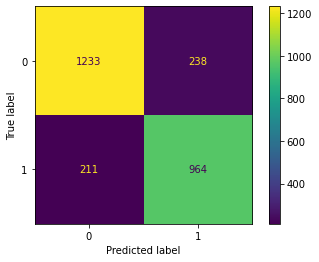

In [25]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier()
dtc.fit(x_train_scaled,y_train)
y_pred_dtc = dtc.predict(x_test_scaled)
print(classification_report(y_train, dtc.predict(x_train_scaled)))
print(classification_report(y_test, y_pred_dtc))
plot_confusion_matrix(dtc, x_test_scaled, y_test)
dt_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dtc})
dt_dataframe

### RandomForest

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      5881
           1       0.96      0.90      0.93      5881

    accuracy                           0.93     11762
   macro avg       0.93      0.93      0.93     11762
weighted avg       0.93      0.93      0.93     11762

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1471
           1       0.84      0.76      0.80      1175

    accuracy                           0.83      2646
   macro avg       0.83      0.82      0.82      2646
weighted avg       0.83      0.83      0.83      2646



c:\Users\Yousef\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,Actual,Predicted
13061,0,1
9100,0,0
272,0,0
4194,1,1
7149,1,1
...,...,...
11914,0,0
5519,1,1
1558,1,1
11659,0,0


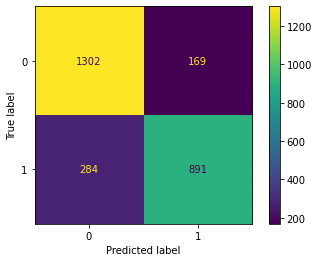

In [193]:
from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier(max_depth=15, random_state=42, n_estimators=100,min_samples_leaf=4, min_samples_split=2, max_features='sqrt')
rf = RandomForestClassifier( random_state=42, n_estimators=100, max_depth=25, min_samples_leaf=1, max_features='log2', bootstrap=True)
#rf = RandomForestClassifier()
rf.fit(x_train_scaled,y_train)
y_pred_rf = rf.predict(x_test_scaled)
print(classification_report(y_train, rf.predict(x_train_scaled)))
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(rf, x_test_scaled, y_test)
rf_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
rf_dataframe

In [194]:
from sklearn.model_selection import KFold,cross_validate
kfold = KFold(n_splits=10)
scores = cross_validate(rf,x_train_scaled,y_train,cv=kfold)
scores

{'fit_time': array([1.2141037 , 1.17106605, 1.17406869, 1.14904618, 1.12791348,
        1.13503361, 1.13903761, 1.15405035, 1.15805483, 1.13703609]),
 'score_time': array([0.02702451, 0.02402186, 0.02402163, 0.02502251, 0.0240221 ,
        0.02402163, 0.02402115, 0.02502275, 0.02302074, 0.02201939]),
 'test_score': array([0.84791844, 0.81138488, 0.81292517, 0.83248299, 0.82227891,
        0.80697279, 0.81292517, 0.82312925, 0.83248299, 0.70663265])}

In [195]:
scores['test_score'].mean()

0.810913324548171

### xgboost

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      5881
           1       0.94      0.93      0.93      5881

    accuracy                           0.93     11762
   macro avg       0.93      0.93      0.93     11762
weighted avg       0.93      0.93      0.93     11762

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1471
           1       0.84      0.83      0.84      1175

    accuracy                           0.86      2646
   macro avg       0.85      0.85      0.85      2646
weighted avg       0.86      0.86      0.86      2646



c:\Users\Yousef\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,Actual,Predicted
13061,0,0
9100,0,0
272,0,0
4194,1,1
7149,1,0
...,...,...
11914,0,1
5519,1,1
1558,1,1
11659,0,0


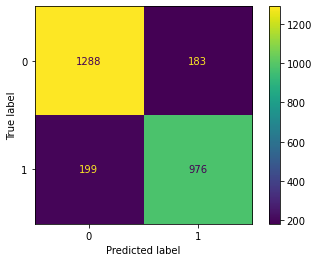

In [163]:
from xgboost import XGBClassifier
xgb = XGBClassifier(gamma=0.2, learning_rate=0.1, max_depth=40, n_estimators=50, reg_alpha=3, reg_lambda=0.5, subsample = 0.8, n_jobs=-1)
#xgb = XGBClassifier(n_jobs=-1)
xgb.fit(x_train_scaled,y_train)
y_pred_xgb = xgb.predict(x_test_scaled)
print(classification_report(y_train, xgb.predict(x_train_scaled)))
print(classification_report(y_test, y_pred_xgb))
plot_confusion_matrix(xgb, x_test_scaled, y_test)
xgb_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})
xgb_dataframe

In [165]:
from sklearn.model_selection import KFold,cross_validate
kfold = KFold(n_splits=10)
scores = cross_validate(xgb,x_train_scaled,y_train,cv=kfold)
scores

{'fit_time': array([3.39709115, 2.91365266, 2.72848392, 2.76752043, 2.8946352 ,
        2.90864825, 2.91365314, 2.98671913, 2.84559059, 2.95569062]),
 'score_time': array([0.00400376, 0.00500488, 0.00600529, 0.00500393, 0.006006  ,
        0.00500464, 0.00500512, 0.00400352, 0.00500441, 0.00600576]),
 'test_score': array([0.84961767, 0.83942226, 0.84013605, 0.85204082, 0.84098639,
        0.80867347, 0.84098639, 0.83673469, 0.84013605, 0.87585034])}

In [166]:
scores['test_score'].mean()

0.8424584149717662

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'gamma': [0, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.4, 0.6, 0.8],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0.1, 0.5, 1],
}
grid_search = GridSearchCV(xgb,param_grid=param_grid,cv=3, n_jobs=-1, verbose=3)
grid_search.fit(x_train_scaled,y_train)

Fitting 3 folds for each of 2187 candidates, totalling 6561 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012...
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'reg_alpha': [0, 0.1, 1], 'reg_lambda': [0.1, 0.5, 1],
                         'subsample': [0.4, 0.6, 0.8]},
             verbose=3)

In [57]:
final_xgb_model = grid_search.best_estimator_
final_xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [58]:
list[final_xgb_model]

list[XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)]

In [59]:
final_xgb_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0.2,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_bin': 256,
 'max_cat_threshold': 64,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 7,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 200,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 1,
 'reg_lambda': 0.1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 0.8,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      5881
           1       0.93      0.91      0.92      5881

    accuracy                           0.92     11762
   macro avg       0.92      0.92      0.92     11762
weighted avg       0.92      0.92      0.92     11762

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1471
           1       0.84      0.83      0.83      1175

    accuracy                           0.85      2646
   macro avg       0.85      0.85      0.85      2646
weighted avg       0.85      0.85      0.85      2646



c:\Users\Yousef\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,Actual,Predicted
13061,0,1
9100,0,0
272,0,0
4194,1,1
7149,1,0
...,...,...
11914,0,1
5519,1,1
1558,1,1
11659,0,0


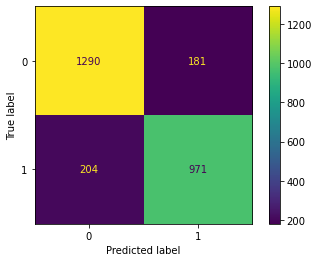

In [60]:
xgb2 = XGBClassifier(**final_xgb_model.get_params())
xgb2.fit(x_train_scaled,y_train)
y_pred_xgb2 = xgb2.predict(x_test_scaled)
print(classification_report(y_train, xgb2.predict(x_train_scaled)))
print(classification_report(y_test, y_pred_xgb2))
plot_confusion_matrix(xgb2, x_test_scaled, y_test)
xgb_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb2})
xgb_dataframe

### KNN

evaluation for training 
               precision    recall  f1-score   support

           0       0.79      0.85      0.82      4275
           1       0.84      0.77      0.80      4275

    accuracy                           0.81      8550
   macro avg       0.81      0.81      0.81      8550
weighted avg       0.81      0.81      0.81      8550

evaluation for testing 
               precision    recall  f1-score   support

           0       0.70      0.76      0.73      1060
           1       0.61      0.53      0.57       748

    accuracy                           0.66      1808
   macro avg       0.65      0.64      0.65      1808
weighted avg       0.66      0.66      0.66      1808



c:\Users\Yousef\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,Actual,Predicted
1922,0,0
1318,1,1
4787,0,0
2115,0,0
5689,0,0
...,...,...
6068,1,1
3245,1,0
5327,1,1
1111,0,1


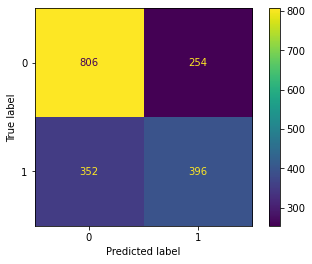

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled,y_train)
y_pred_knn = knn.predict(x_test_scaled)
print('evaluation for training \n',classification_report(y_train,knn.predict(x_train_scaled)))
print('evaluation for testing \n',classification_report(y_test,y_pred_knn))
plot_confusion_matrix(knn, x_test_scaled, y_test)
knn_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})
knn_dataframe